<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#读取图片" data-toc-modified-id="读取图片-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>读取图片</a></span></li><li><span><a href="#生成目标图" data-toc-modified-id="生成目标图-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>生成目标图</a></span></li><li><span><a href="#保存数据" data-toc-modified-id="保存数据-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>保存数据</a></span></li></ul></div>

# 读取图片

In [1]:
import numpy as np
%matplotlib inline
path = r'/home/liucc/Workspace/02_Ellipse/03_results/03_brightness/00_train'
xpath = r'x'
ypath = r'y'


In [2]:
import sys
sys.path.append('/home/liucc/Workspace/02_Ellipse/01_data')
from cc_process_image import *

In [3]:
import os

names = os.listdir(f'{path}/{xpath}')
names = [n.split('.')[0] for n in names if n[-3:]=='png']
names.sort()
print(names)

imxs = get_all_images(f'{path}/{xpath}',names,'png')
imys = get_all_images(f'{path}/{ypath}',names,'png')

imxs = preprocess_images(imxs,scale=True)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034']


/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [4]:
len(imxs),len(imys),np.min(imxs[0]),np.max(imxs[0]),np.max(imys[0])

(34, 34, 0.0, 1.0, 253)

# 生成目标图

In [5]:
from tqdm import tqdm_notebook as tqdm
from skimage.transform import rotate

width = 256
gap = 128

im_xs = []
im_ys = []

for i,(imx,imy) in tqdm(enumerate(zip(imxs,imys))):

    h,w = imx.shape
    h1,w1 = imy.shape
    
    assert h==h1 and w==w1, "图片尺寸不匹配"

    for r in range(0,max(h-width,1),gap):
        for c in range(0,max(w-width,1),gap):
            
            
            r = max(min([r,h-width]),0)
            c = max(min([c,w-width]),0)
                
            xt = imx[r:r+width,c:c+width].astype(dtype=np.float32)
            yt = imy[r:r+width,c:c+width].astype(dtype=np.float32)
            
            x = np.zeros((width,width),dtype=np.float32)
            y = np.zeros((width,width),dtype=np.float32)
            
            hx,wx = xt.shape
            
            x[:hx,:wx] = xt
            y[:hx,:wx] = yt
            
            assert x.shape[0]==256 and x.shape[1]==256

            thr = np.mean(y)+10
            y = np.where(y>thr,1,0)

            if np.sum(y)>200:
                im_xs.append(x)
                im_ys.append(y)
                    

In [6]:
im_xs[0].shape,im_ys[0].shape

((256, 256), (256, 256))

In [7]:
len(im_xs),len(im_ys),np.max(im_xs[0]),np.min(im_xs[0]),np.max(im_ys[0]),np.min(im_ys[0])

(136, 136, 1.0, 0.02631579, 1, 0)

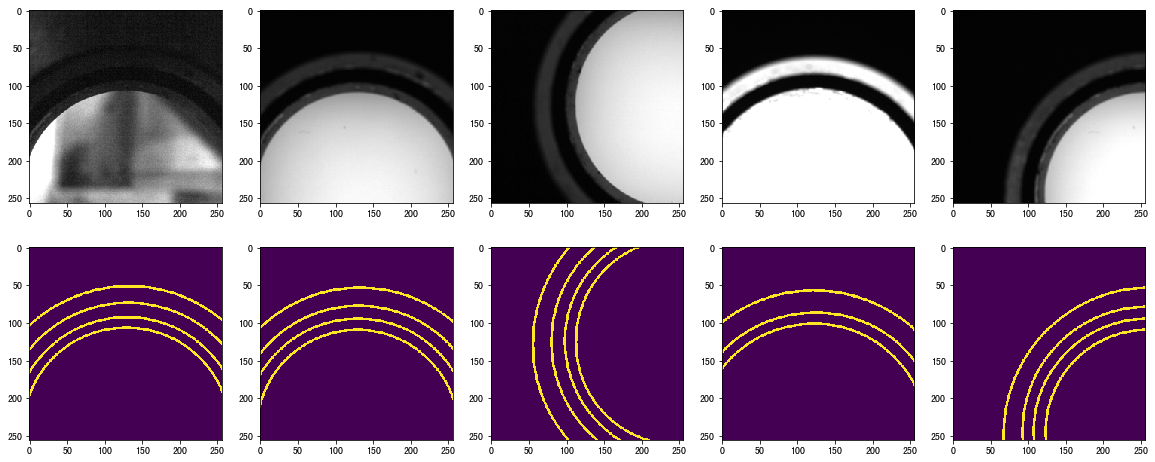

In [8]:
import matplotlib.pyplot as plt

_,axes = plt.subplots(nrows=2, ncols=5,figsize=(20,8))

for i,j in enumerate(np.random.randint(len(im_ys),size=5)):
    axes[0,i].imshow(im_xs[j],cmap=plt.cm.gray,vmin=0,vmax=1)
    axes[1,i].imshow(im_ys[j])

plt.show()

# 保存数据

In [9]:
import pickle

datas = {
        "image":im_xs,
        "edge":im_ys,
        }
    
with open("train_data_brightness.pdat","wb") as f:
    pickle.dump(datas,f)